In [4]:
# -*- coding: utf-8 -*-
import pandas as pd

In [5]:
df = pd.read_csv('mediajobs.csv')

In [6]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False # in case it cannot read Chinese characters

# Overview
The data source is the job information  of media industry within this month among 5 big cities (Beijing, Shanghai, Guangzhou, Shenzhen and Hangzhou) from 51jobs, a Chinese recruitment website. 
https://search.51job.com/list/010000%252C020000%252C030200%252C040000%252C080200%252C00,000000,4500,13,3,99,%2B,2,1.html?lang=c&stype=1&postchannel=0000&workyear=99&cotype=99&degreefrom=04&jobterm=01&companysize=99&lonlat=0%2C0&radius=-1&ord_field=0&confirmdate=9&fromType=&dibiaoid=0&address=&line=&specialarea=00&from=&welfare=

# 1. Job information among five big Chinese cities
Through the Bar chart and Pie chart below, we can conclude that Beijing takes the largest demand of media workers this month, with an amount of 700 positions, followed by Shanghai, Guangzhou, Shenzhen and Hangzhou. 

In [7]:
df1 = df['base'].value_counts().sort_values(ascending=False)
Base = pd.DataFrame(df1)

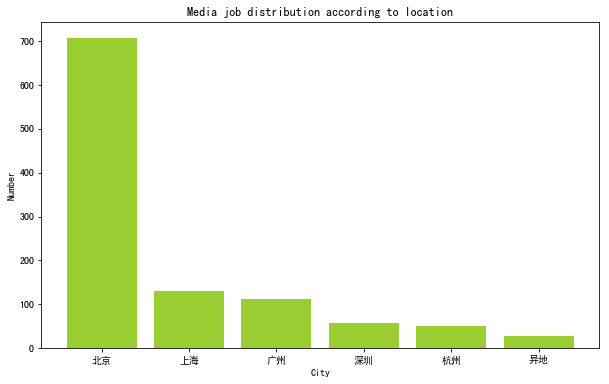

In [8]:
F1 = plt.figure(figsize=(10,6)) 
plt.bar(Base.index,Base.base,color = 'yellowgreen') 
plt.title('Media job distribution according to location')
plt.xlabel('City')
plt.ylabel('Number')
plt.show()

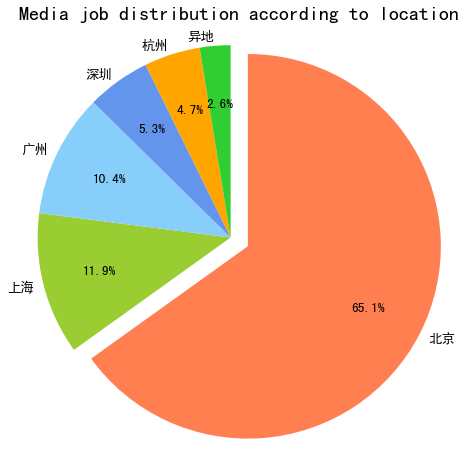

In [9]:
F2 = plt.figure(figsize=(8,8))
plt.pie(Base.base, 
        labels = Base.index, 
        autopct = '%1.1f%%', 
        explode = (0.1,0,0,0,0,0),
        textprops={'fontsize': 13.5},
        colors = ['coral','yellowgreen','lightskyblue','cornflowerblue','orange','limegreen'],
        shadow = False,
        labeldistance = 1.05,
        counterclock=False,
        pctdistance = 0.7,
        startangle = 90)
plt.title('Media job distribution according to location',fontsize = 20)
plt.axis('equal')
plt.show()

# 2. Pay level of media positions
The original salary levels of each position were organized in differnet forms, so I re-divided the pay level into 12 segments.
From the bar chart we can conclude that the amount of monthly payment of these positions mainly fall in to the range of 4000 to 12000 RMB, and [6000,8000] is the most common payment range. 

In [10]:
df2 = df.dropna()

In [11]:
def convert(x):
    return{
        '0.3-1万/月':'D','0.4-1.2万/月':'E', '0.4-1.5万/月':'E', '0.4-1.5万/月':'D', '0.5-1万/月':'D', '0.5-1.5万/月':'D',
        '0.4-2万/月':'G', '0.5-1.2万/月':'E', '0.5-1.5万/月':'F','0.4-2万/月':'G','0.6-1.1万/月':'E','0.6-1.2万/月':'E',
        '0.6-1.3万/月':'E','0.6-1.5万/月':'F','0.6-1万/月':'E','0.7-1.2万/月':'E','0.7-1.4万/月':'F','0.7-1.5万/月':'F',
        '0.7-1万/月':'E','0.8-1.1万/月':'F','0.8-1.2万/月':'F','0.8-1.3万/月':'F','0.8-1.4万/月':'F','0.8-1.5万/月':'F',
        '0.8-1.6万/月':'G','0.8-1.8万/月':'G','0.8-1万/月':'F','0.8-2万/月':'J','1.3-1.5万/月':'H','1.3-2万/月':'I',
        '1.4-1.6万/月':'H','1.5-1.5千/月':'A','1.5-2.5万/月':'K','1.5-2千/月':'A','1.5-2万/月':'I','1.5-3万/月':'L',
        '1.5千以下/月':'A','10-15万/年':'F','10-20万/年':'G','1-1.2万/月':'F','1-1.3万/月':'F','1-1.5万/月':'G',
        '1-1.6万/月':'G', '12-16万/年':'F', '1-2万/月':'H', '15-20万/年':'H', '20-30万/年':'K', '2-3千/月':'B',
        '3.4-8千/月':'C','3.5-5千/月':'C','3.5-6千/月':'C','3.5-6.5千/月':'C','3-4.5千/月':'C','3-4千/月':'B',
        '3-5千/月':'C','3-6千/月':'C','3-8千/月':'C','4.5-5千/月':'C','4.5-5.5千/月':'C','4.5-6千/月':'C',
        '4.5-6.5千/月':'C','4.5-7千/月':'C','4.5-8千/月':'D','4.5-8.5千/月':'D','4.5-9千/月':'D','4-5千/月':'C',
        '4-5.5千/月':'C','4-6千/月':'C','4-7千/月':'C','4-8千/月':'C','4-5万/年':'B','5-7千/月':'D',
        '5-6.5千/月':'D','5.5-6.5千/月':'D','5.5-8千/月':'D',"5-6千/月":'C','5-6万/年':'C','5-7万/月':'C',
        '6-7千/月':'D','6-8千/月':'D','5-8千/月':'D','5-9千/月':'D','6-8万/年':'C','6-9千/月':'C',
        '7-10万/年':'D','7-12万/年':'D','7-25万/年':'G','7-9千/月':'E','7-8.5千/月':'D','7-8千/月':'D',
        '8-10万/年':'D','9-10万/年':'D','9-11万/年':'E','2-2.5万/月':'L','0.4-1万/月':'D','1.2-2.4万/月':'J'
    }[x]

df2['monthsalary'] = df2['salary'].apply(convert)

d:\venv\test\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
def convert(x):
    return{
        'A':'0-0.2万/月',
        'B':'0.2-0.4万/月',
        'C':'0.4-0.6万/月',
        'D':'0.6-0.8万/月',
        'E':'0.8-1万/月',
        'F':'1-1.2万/月',
        'G':'1.2-1.4万/月',
        'H':'1.4-1.6万/月',
        'I':'1.6-1.8万/月',
        'J':'1.8-2万/月',
        'K':'2-2.2万/月',
        'L':'2.2-2.4万/月'
        
    }[x]
df2['averagesalary'] = df2['monthsalary'].apply(convert)

d:\venv\test\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
df2_1 = df2.drop(columns=['monthsalary','salary'])

In [14]:
df2_2 = df2_1['averagesalary'].value_counts()
Salary = pd.DataFrame(df2_2)

In [15]:
Salary.sort_index(inplace=True)

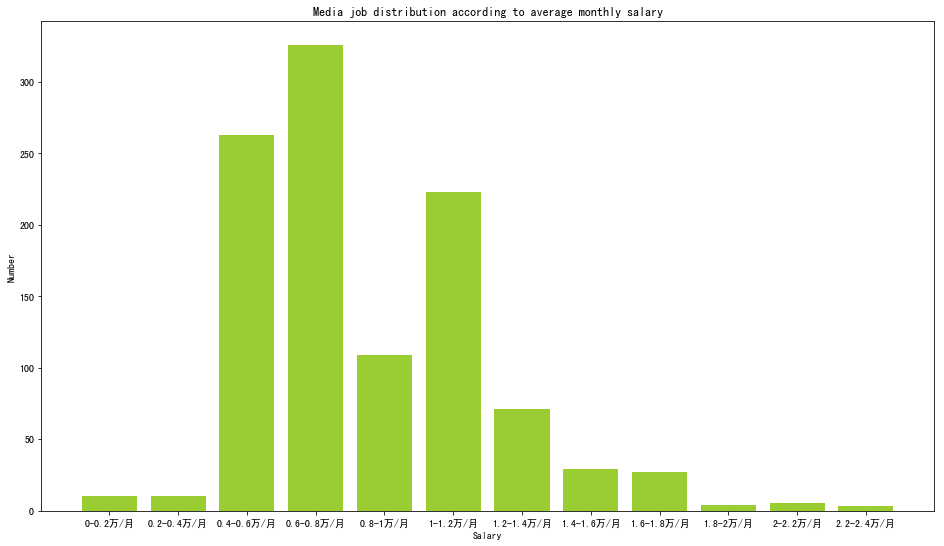

In [16]:
F3 = plt.figure(figsize=(16,9)) 
plt.bar(Salary.index,Salary.averagesalary,color = 'yellowgreen') 
plt.title('Media job distribution according to average monthly salary')
plt.xlabel('Salary')
plt.ylabel('Number')
plt.show()

# 3. What if we combining location and peyment level together?
If we count the number of each salary level of each city, it's not hard to find that in Beijing and Shanghai, monthly payment above 8000 takes around 50% of the salary distribution, which is larger than those in Guangzhou, Shenzhen and Hangzhou.

In [17]:
df3 = pd.read_csv('grouped.csv')

In [18]:
salary = df3.T.values   
salary

array([[  6,   3, 155, 192,  76, 165,  51,  19,  26,   4,   3,   2],
       [  1,   1,  21,  45,  12,  28,  13,   6,   0,   0,   0,   1],
       [  2,   5,  48,  37,   6,  11,   2,   2,   0,   0,   0,   0],
       [  0,   0,   9,  26,  10,  10,   2,   0,   1,   0,   0,   0],
       [  1,   1,  18,  18,   3,   6,   0,   2,   0,   0,   2,   2]],
      dtype=int64)

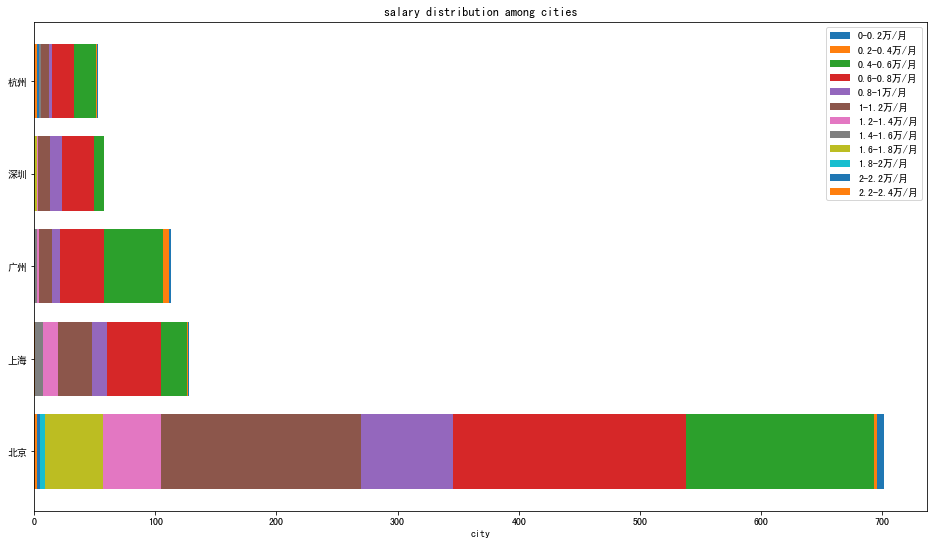

In [19]:
fig,ax=plt.subplots(figsize=(16,9))
city = [str(i) for i in df3.columns]  
numbers = df3.T.values  
v1=[i[0]+i[1]+i[2]+i[3]+i[4]+i[5]+i[6]+i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v2=[i[1]+i[2]+i[3]+i[4]+i[5]+i[6]+i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v3=[i[2]+i[3]+i[4]+i[5]+i[6]+i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v4=[i[3]+i[4]+i[5]+i[6]+i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v5=[i[4]+i[5]+i[6]+i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v6=[i[5]+i[6]+i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v7=[i[6]+i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v8=[i[7]+i[8]+i[9]+i[10]+i[11] for i in numbers]  
v9=[i[8]+i[8]+i[10]+i[11] for i in numbers]  
v10=[i[9]+i[10]+i[11] for i in numbers]  
v11=[i[10]+i[11] for i in numbers]  
v12=[i[11] for i in numbers]  

ax.barh(city,v1)
ax.barh(city,v2)
ax.barh(city,v3)
ax.barh(city,v4)
ax.barh(city,v5)
ax.barh(city,v6)
ax.barh(city,v7)
ax.barh(city,v8)
ax.barh(city,v9)
ax.barh(city,v10)
ax.barh(city,v11)
ax.barh(city,v12)

ax.set(xlabel="city",title="salary distribution among cities")
ax.legend(['0-0.2万/月', '0.2-0.4万/月', '0.4-0.6万/月','0.6-0.8万/月','0.8-1万/月', '1-1.2万/月','1.2-1.4万/月',
       '1.4-1.6万/月', '1.6-1.8万/月', '1.8-2万/月',  '2-2.2万/月','2.2-2.4万/月'],)  
plt.show()